In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up visual aesthetics
sns.set(style='whitegrid')


# Load dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Summary of the dataset
df.info()

# Descriptive statistics for numerical columns
df.describe()

Shape of the dataset: (112634, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                  

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


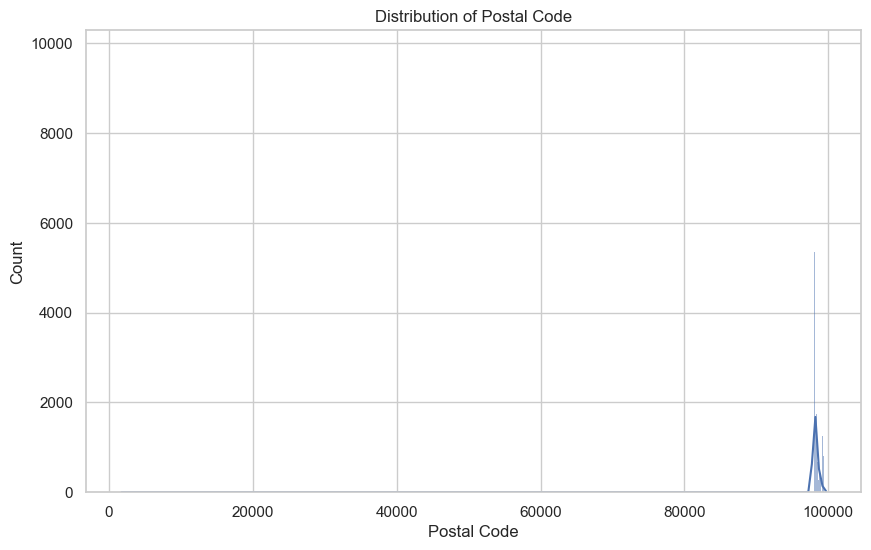

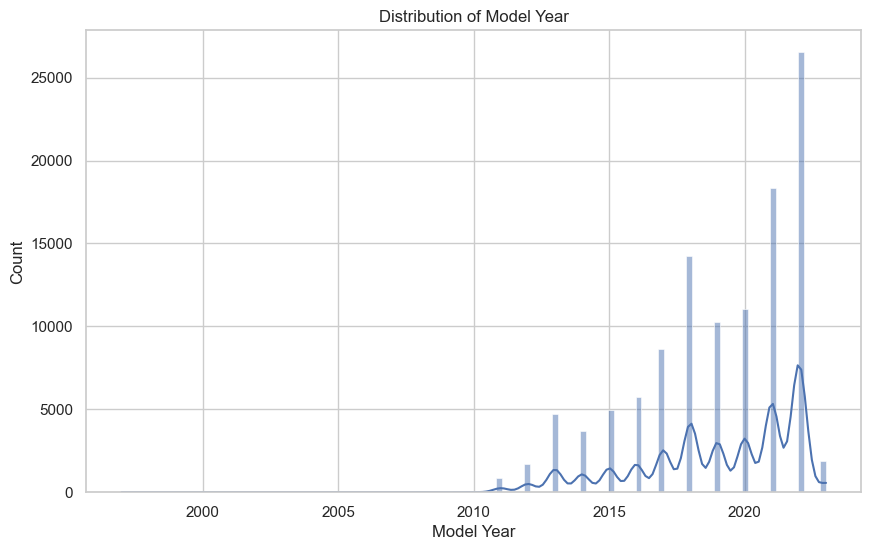

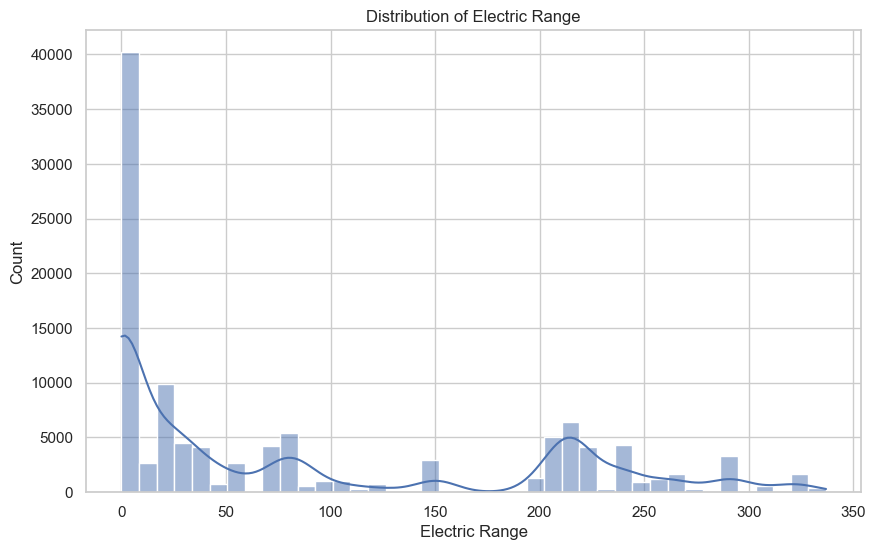

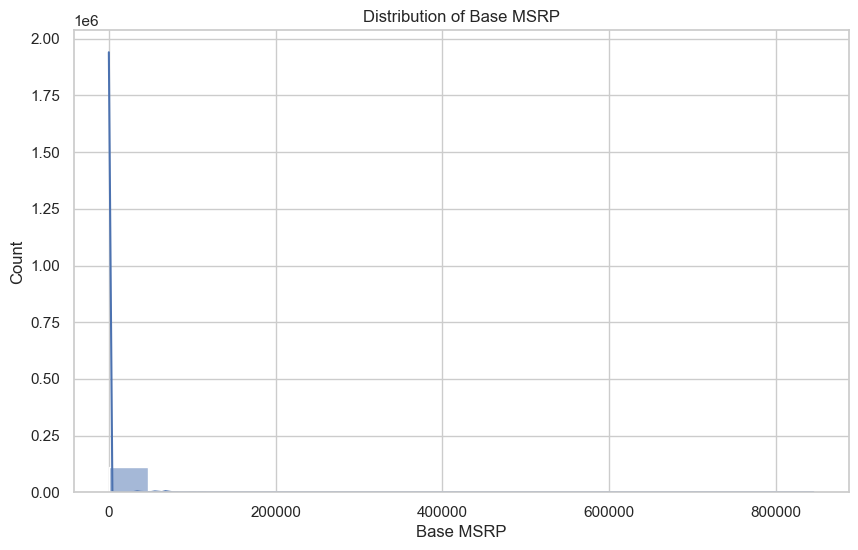

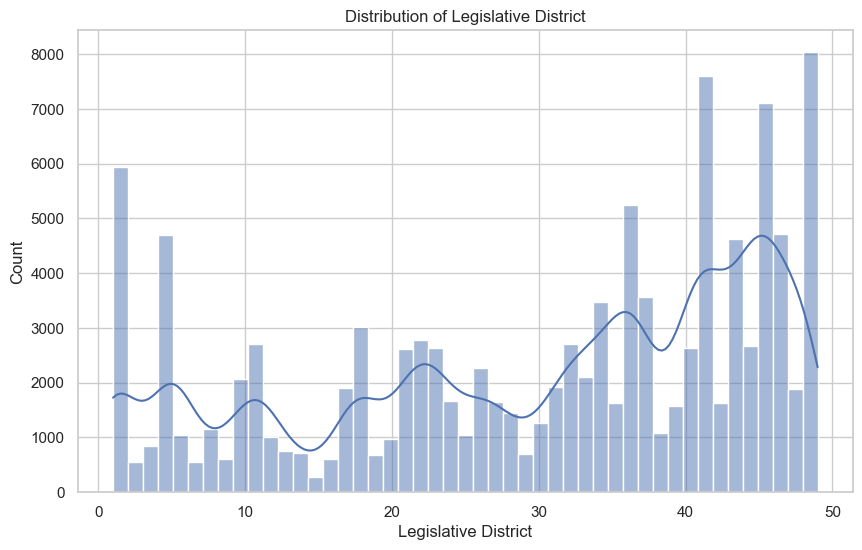

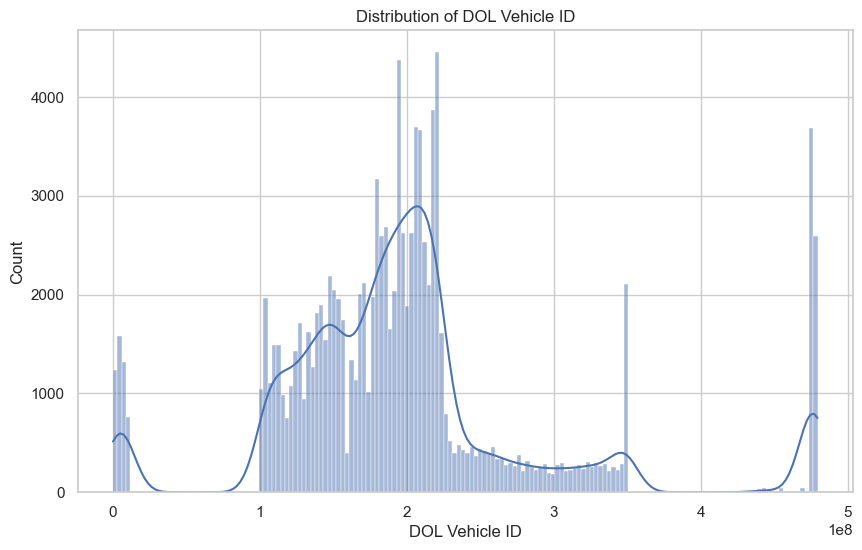

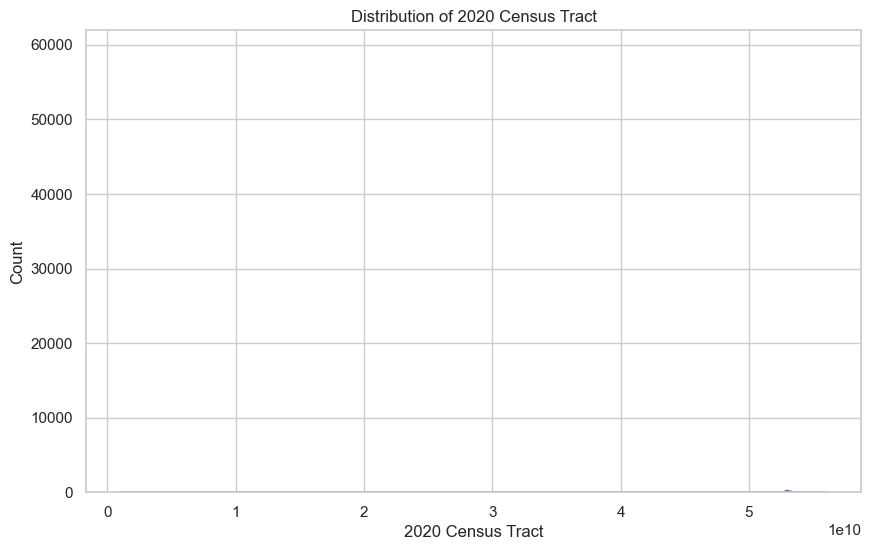

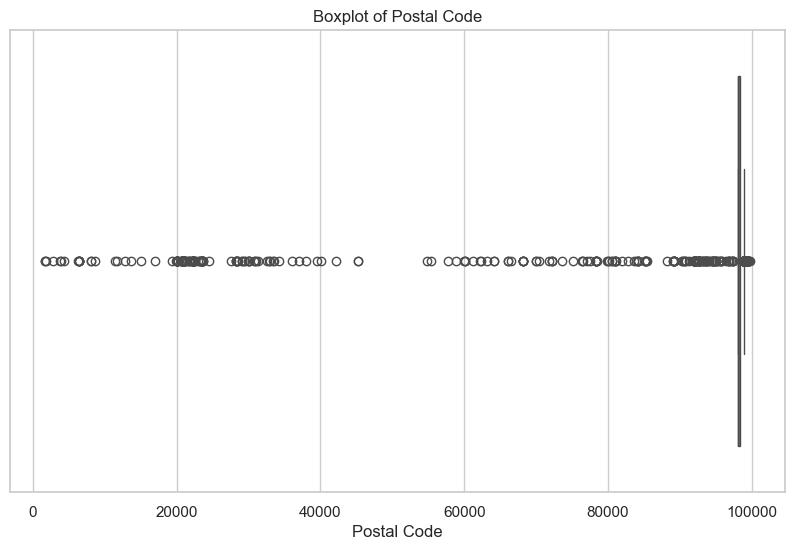

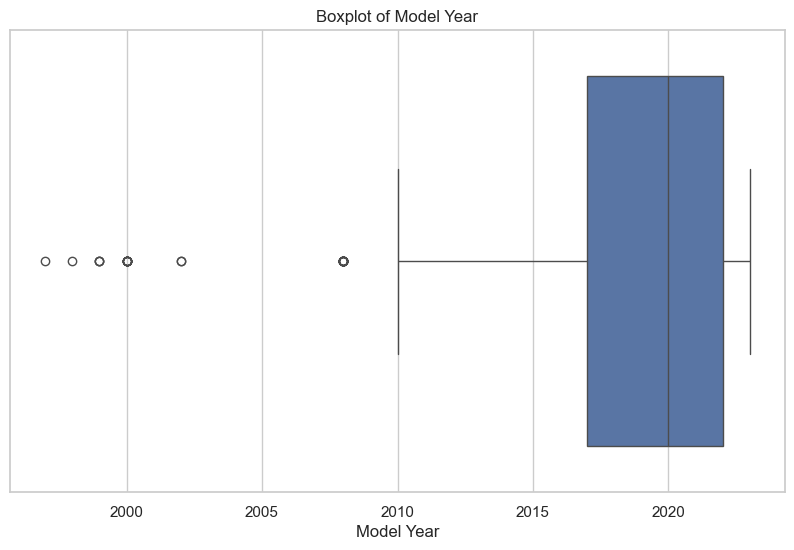

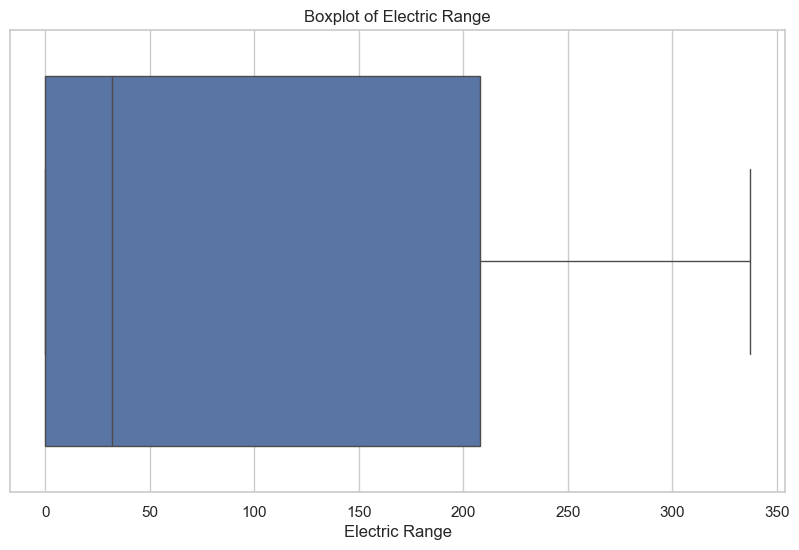

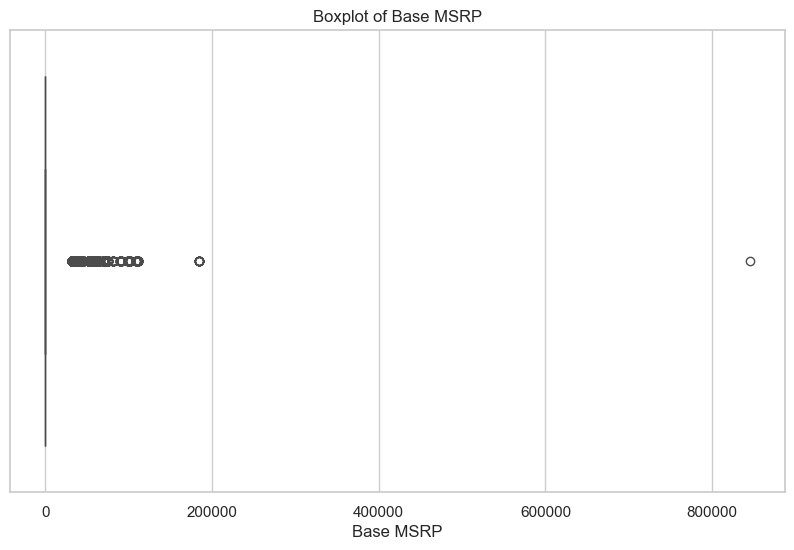

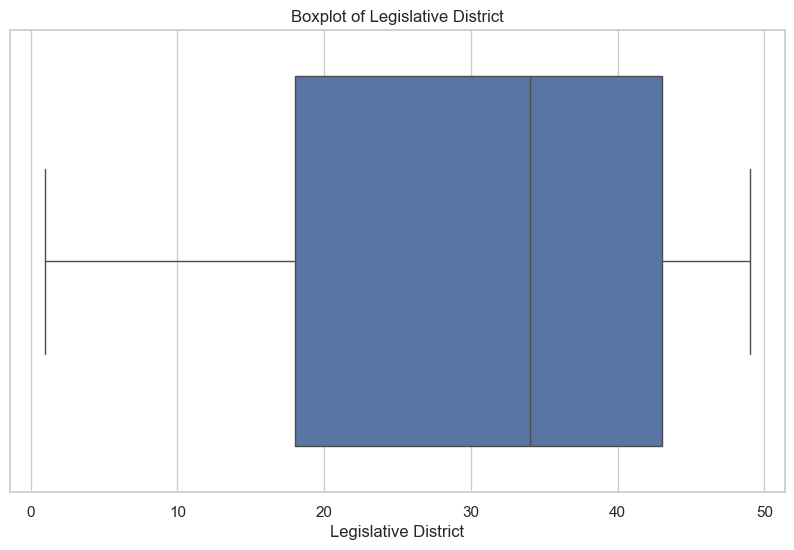

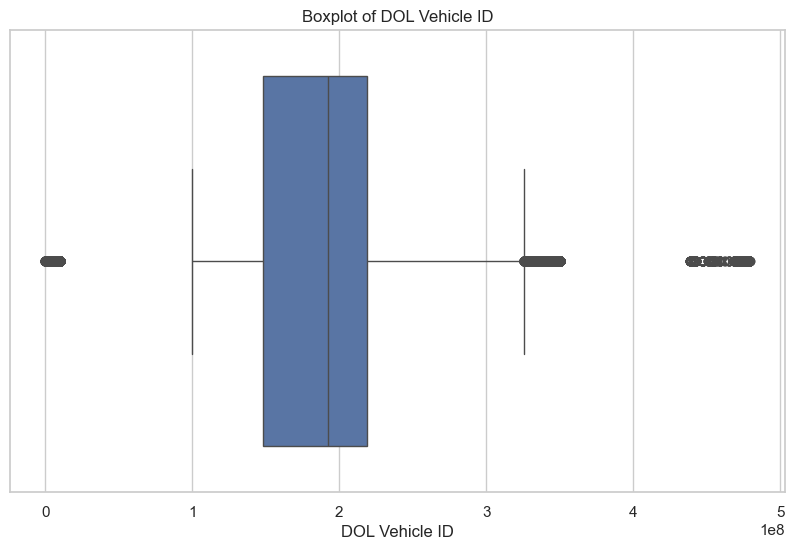

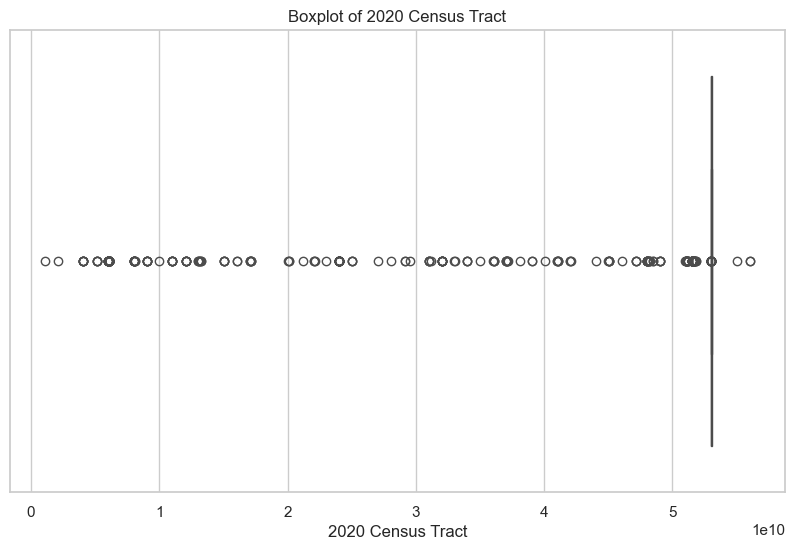

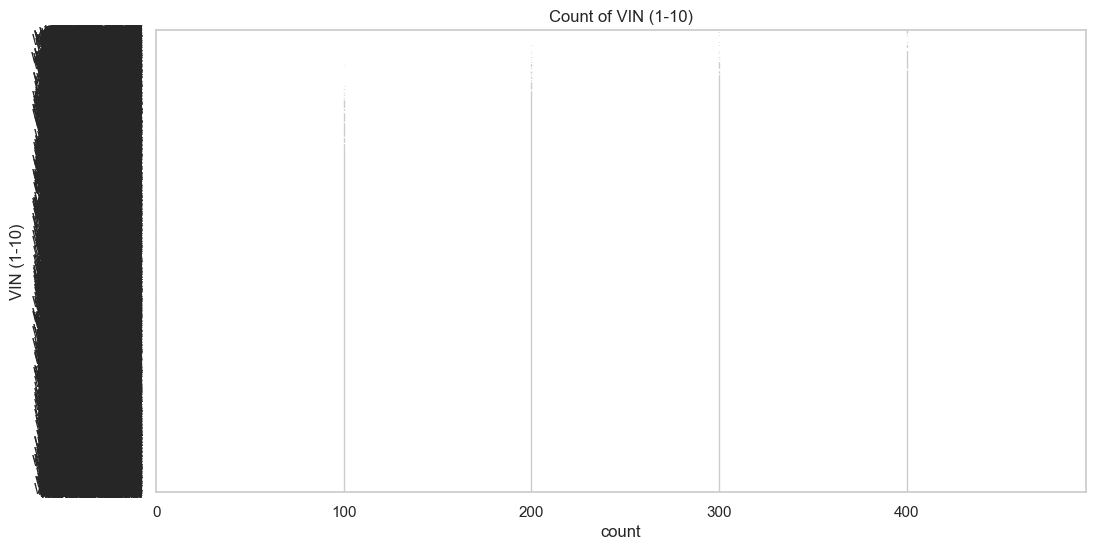

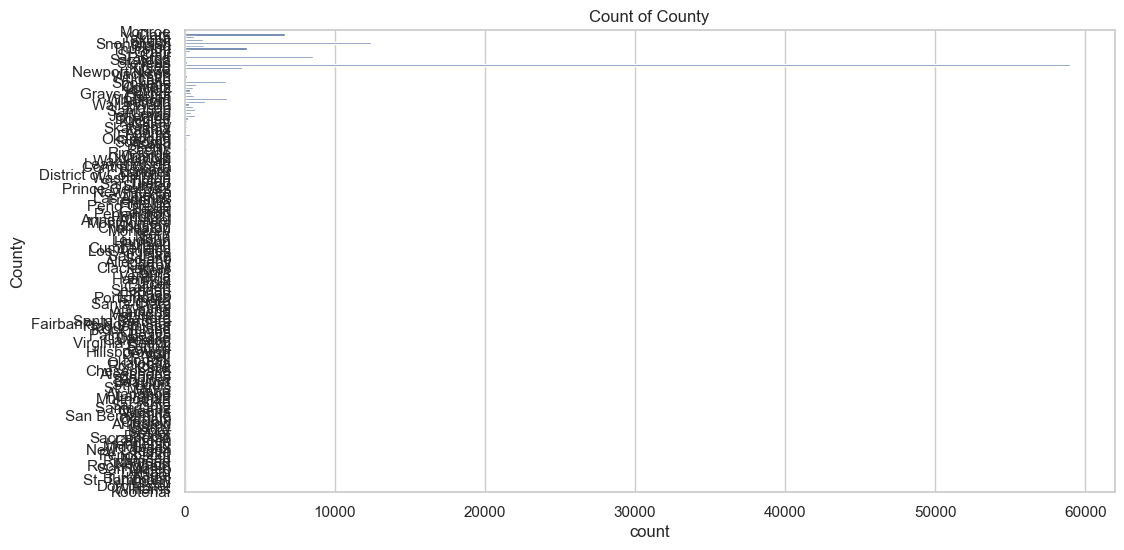

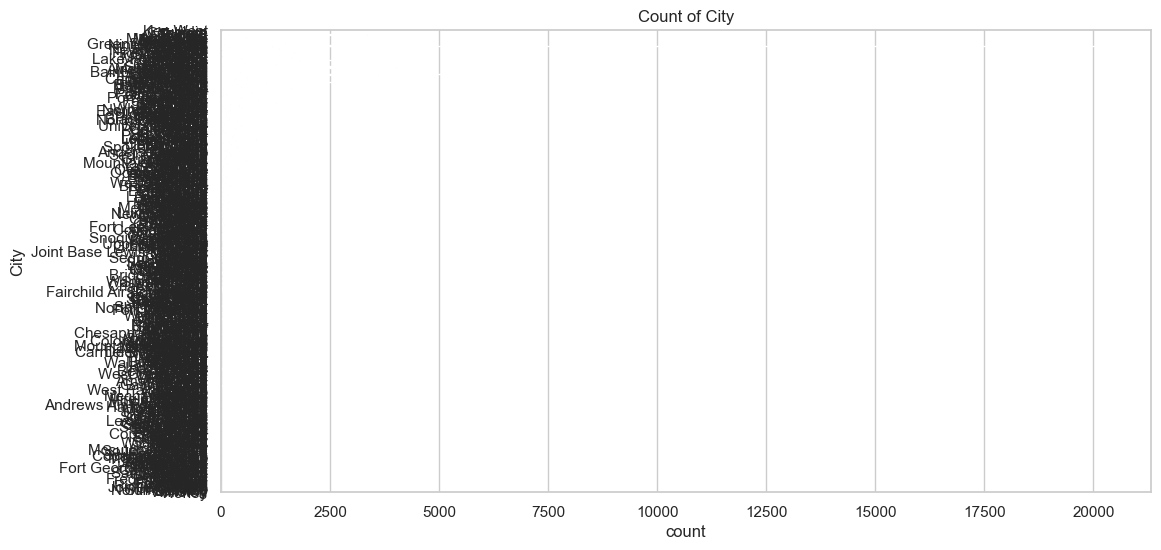

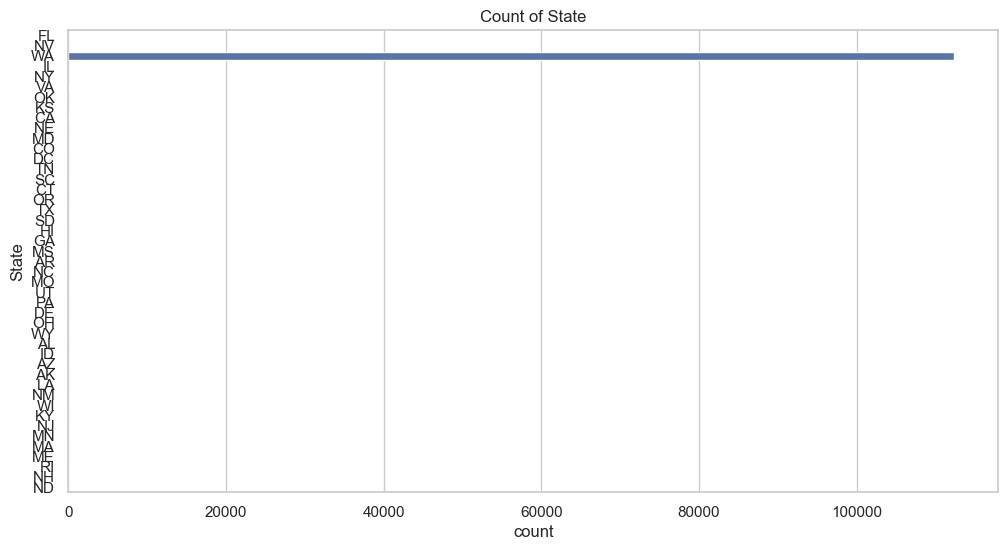

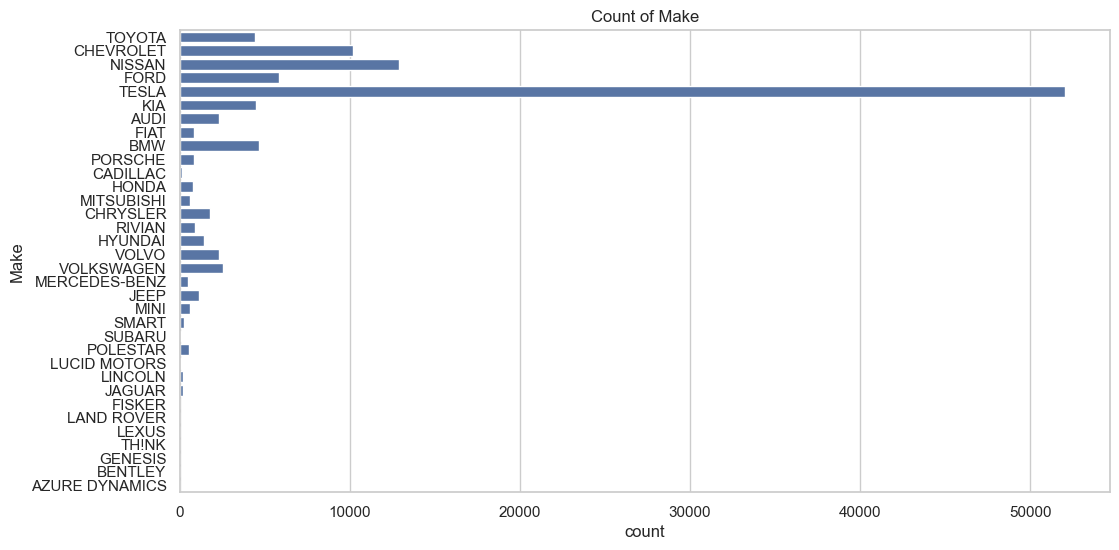

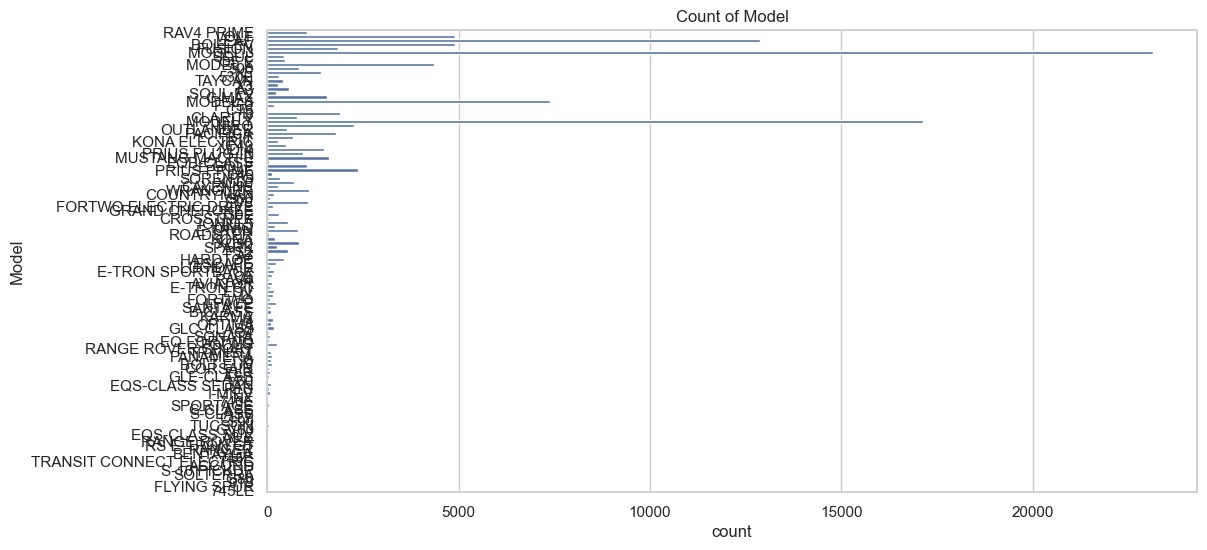

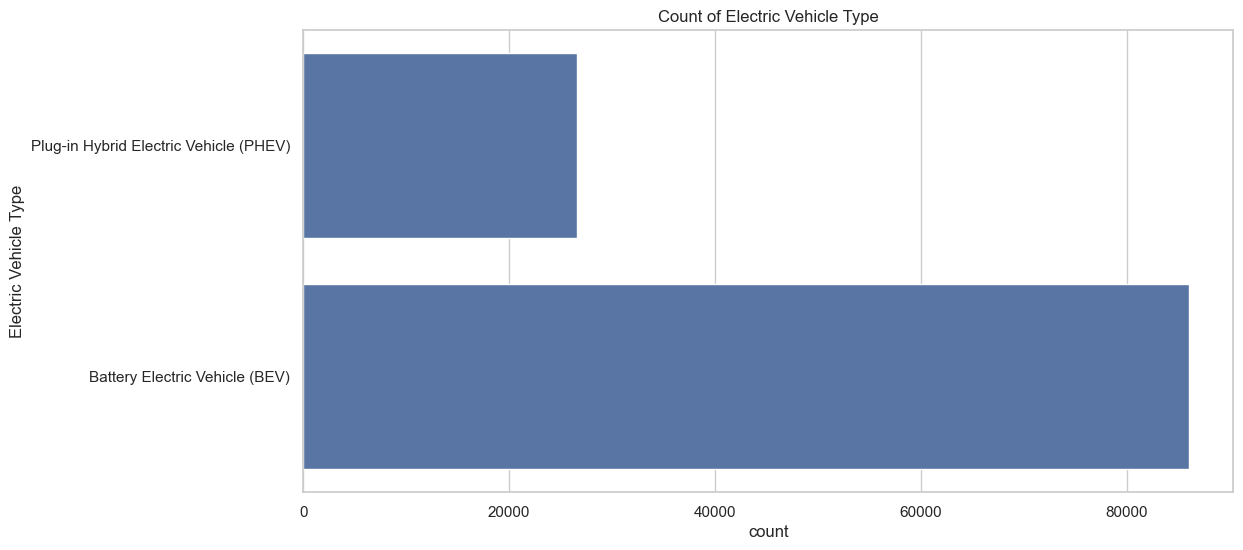

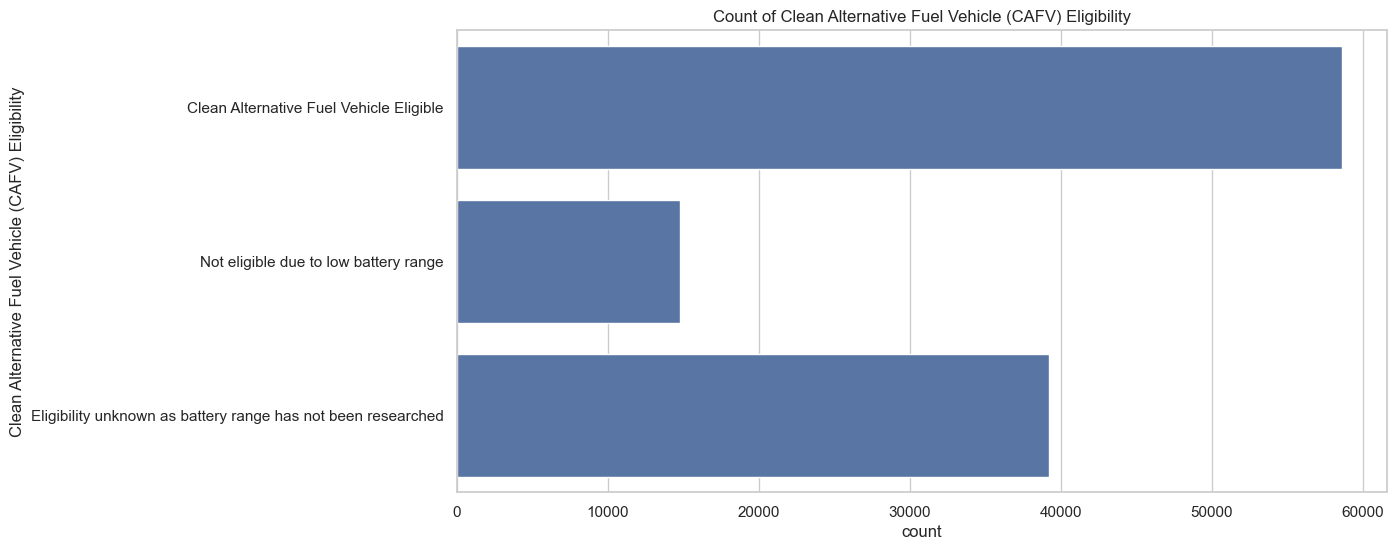

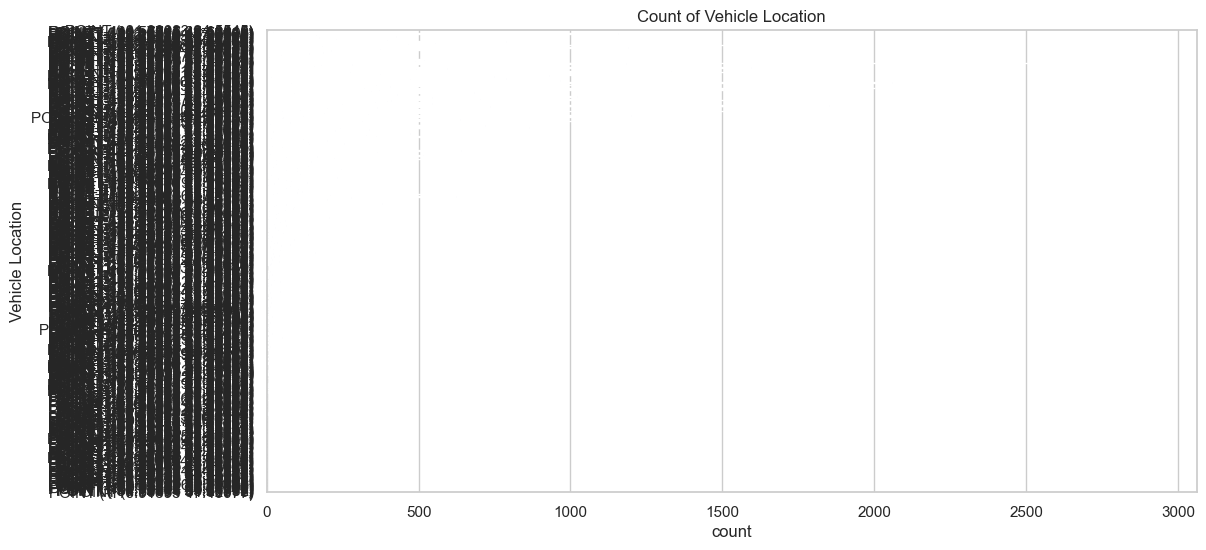

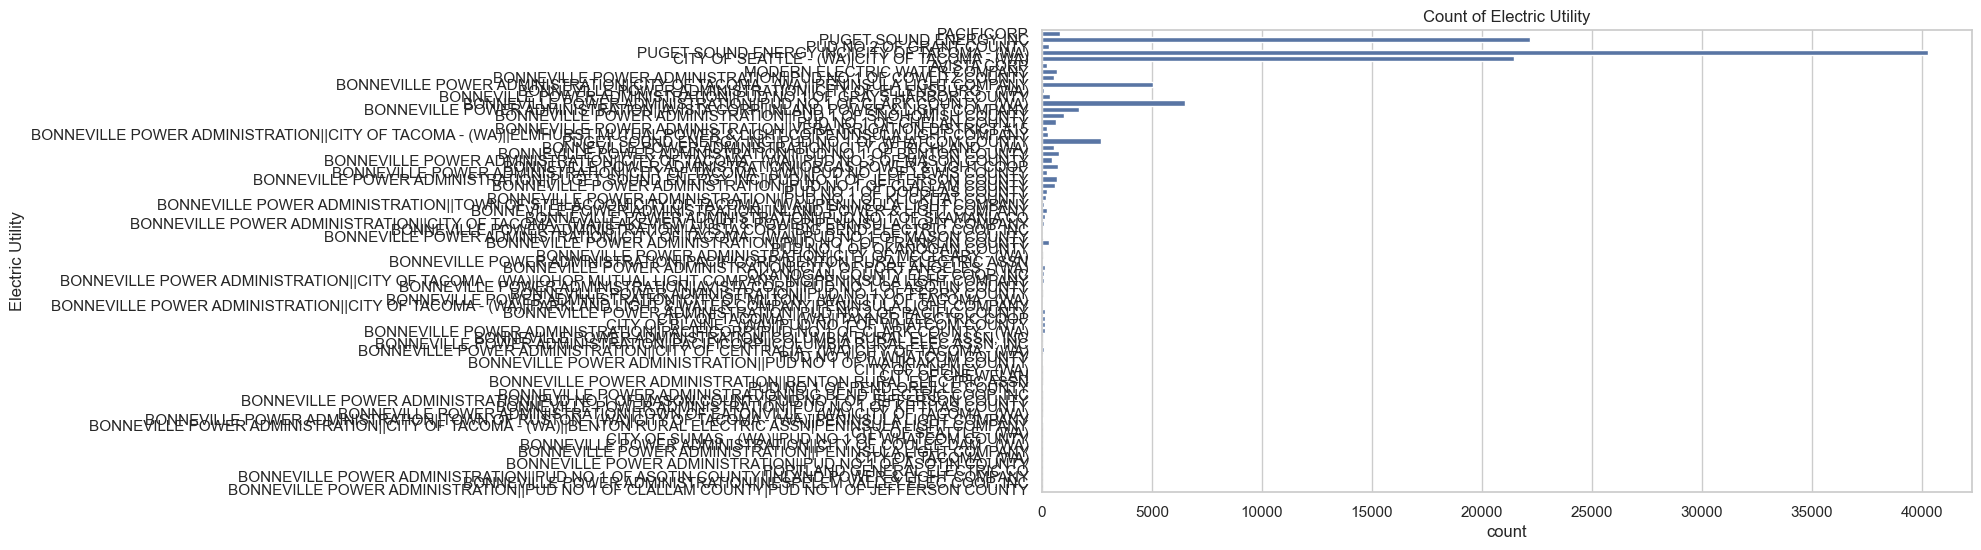

In [5]:
# Univariate analysis (for numeric variables)
# Plot histogram for each numeric variable
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plot to identify outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Univariate analysis for categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
    plt.show()

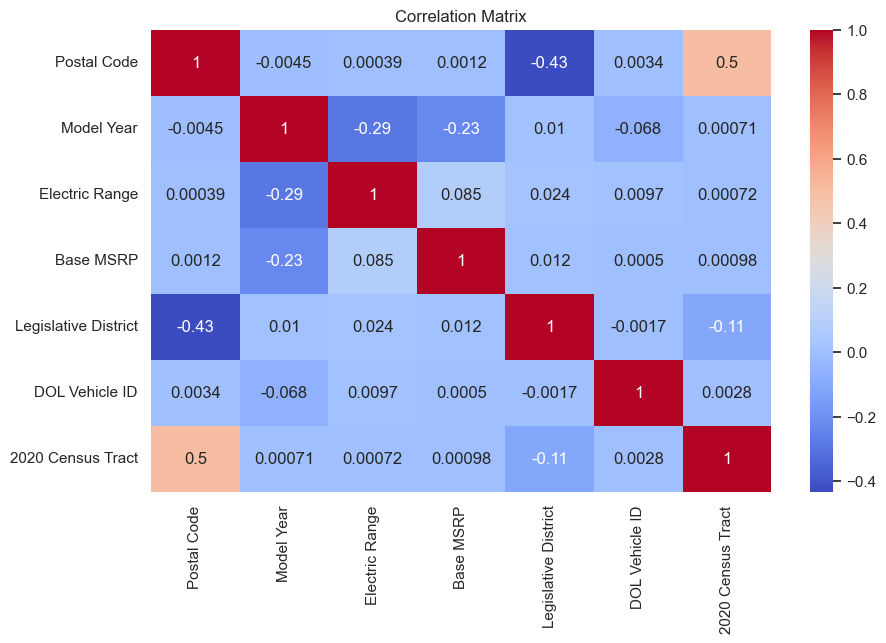

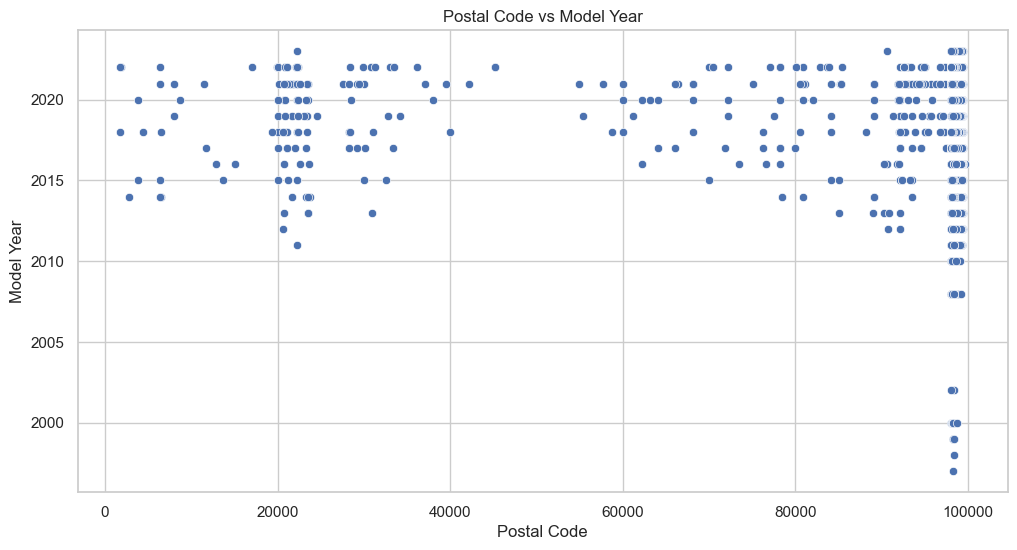

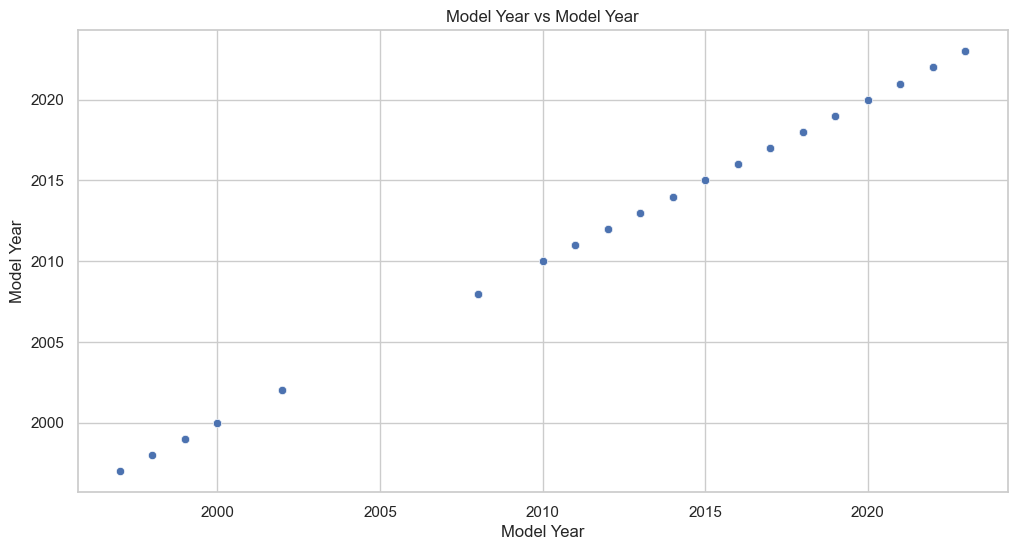

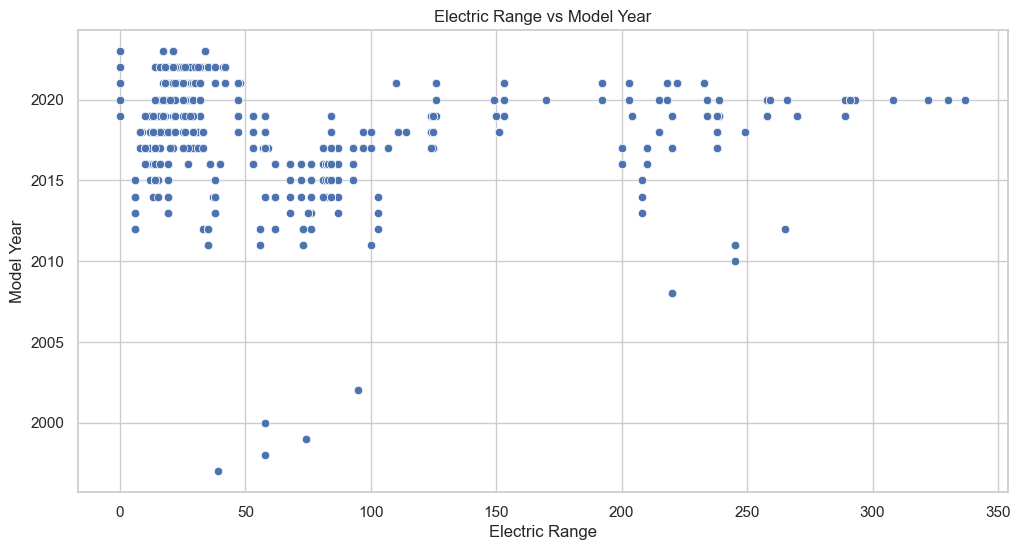

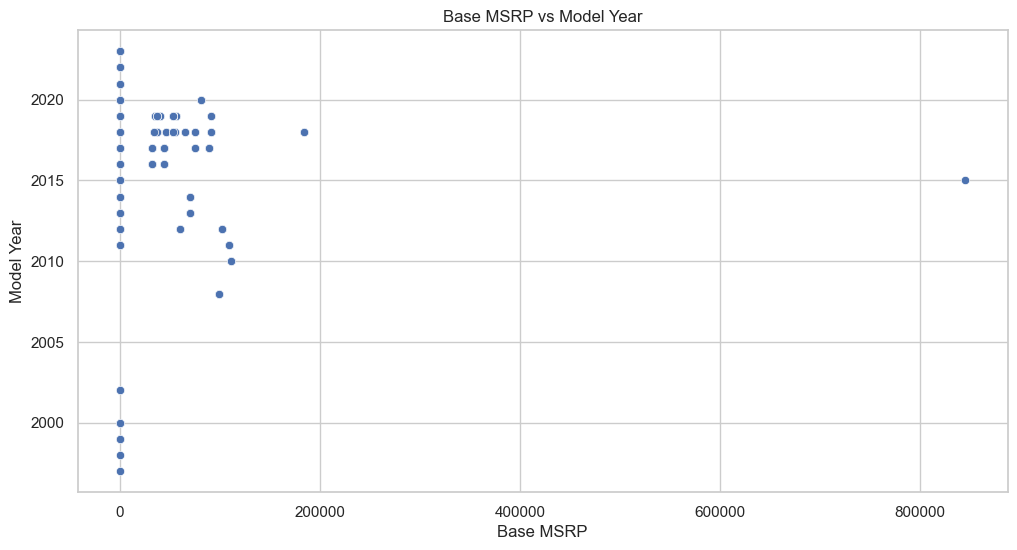

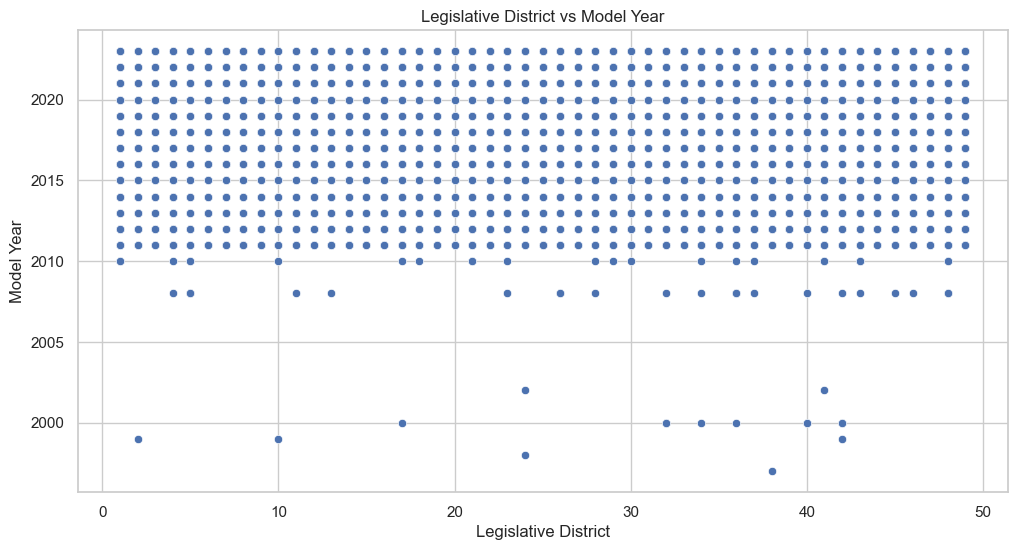

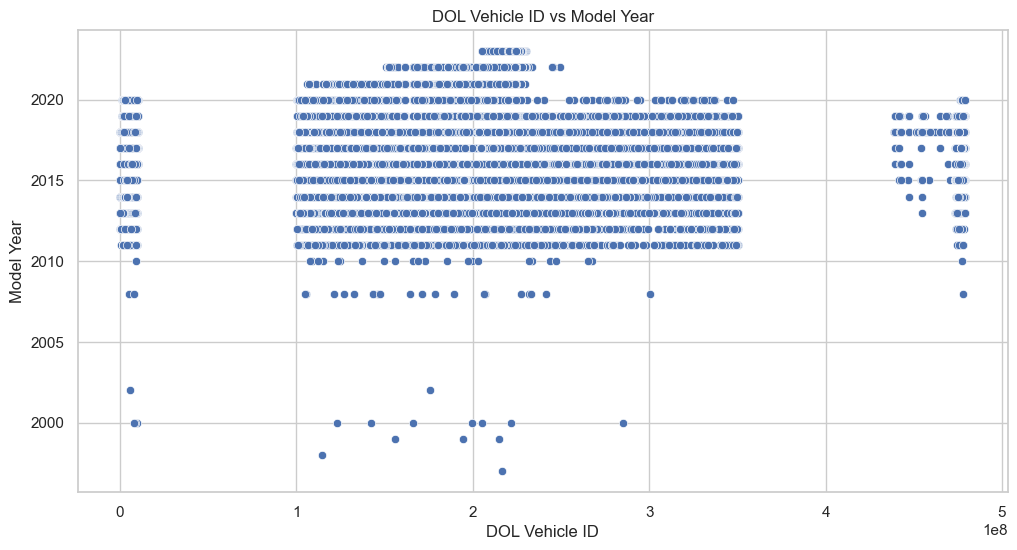

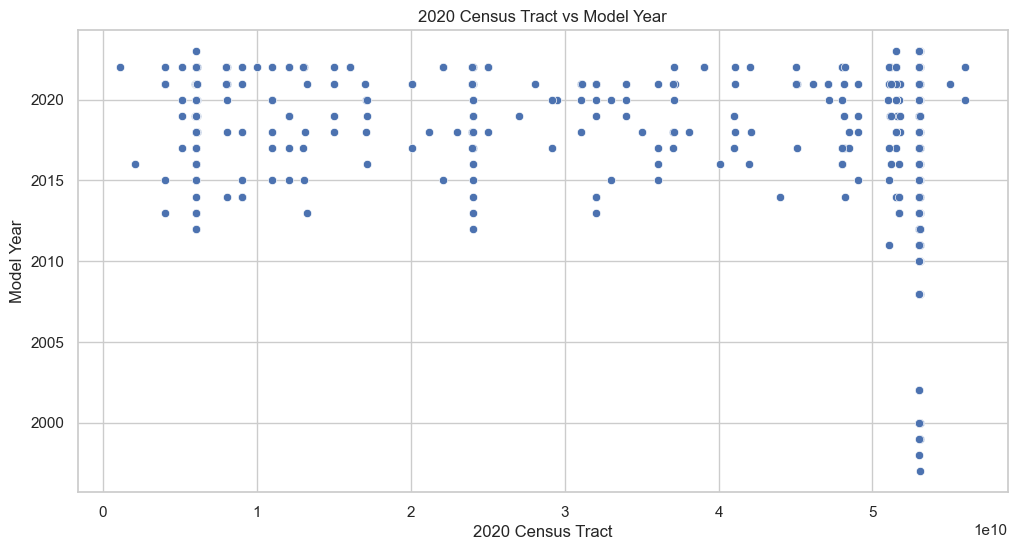

In [42]:
# Bivariate analysis (correlation between numeric variables)
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for bivariate relationships
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[col], y=df['Model Year'])
    plt.title(f'{col} vs Model Year')
    plt.xlabel(col)
    plt.ylabel('Model Year')
    plt.show()

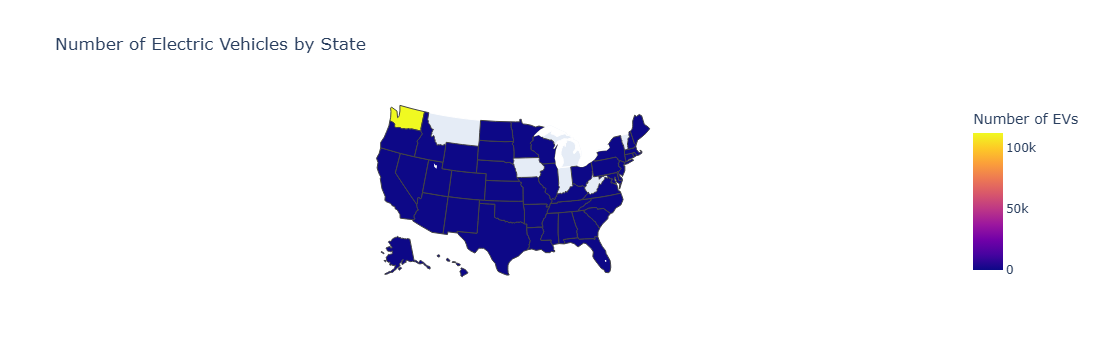

In [34]:
# Count the number of EVs per state
ev_counts_by_state = df['State'].value_counts().reset_index()
ev_counts_by_state.columns = ['State', 'EV_Count']

# Create the Choropleth map
fig = px.choropleth(ev_counts_by_state,
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV_Count',
                    scope='usa',
                    title='Number of Electric Vehicles by State',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'EV_Count': 'Number of EVs'})
                    
# Show the figure
fig.show()

In [40]:
import bar_chart_race as bcr
ev_df_counts=df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)
bcr.bar_chart_race(
    df=ev_df_counts,
    filename='EV Racing Bar Plot.gif',  # Change output file to GIF
    title='Electric Vehicle Make Count Over Time',
    period_length=3000,
    sort ='desc',
    n_bars = 10,
    steps_per_period = 45,
    figsize=(10, 6),  # Adjust figure size (width, height)
    title_size=10,  # Title size
    bar_label_size= 10 # Speed of the animation
)

C:\Users\sbhkg\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\sbhkg\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sbhkg\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sbhkg\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

MovieWriter imagemagick unavailable; using Pillow instead.
